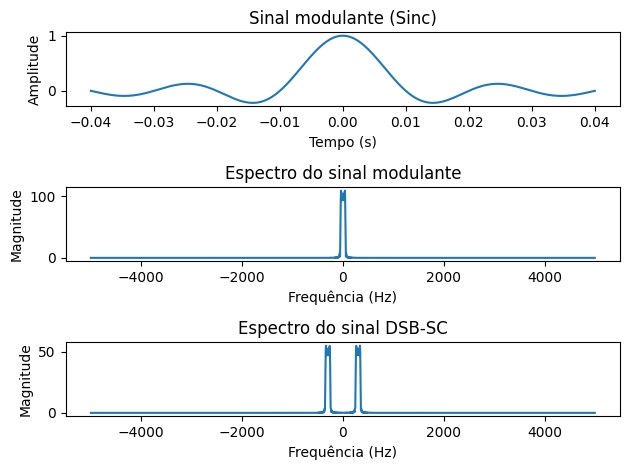

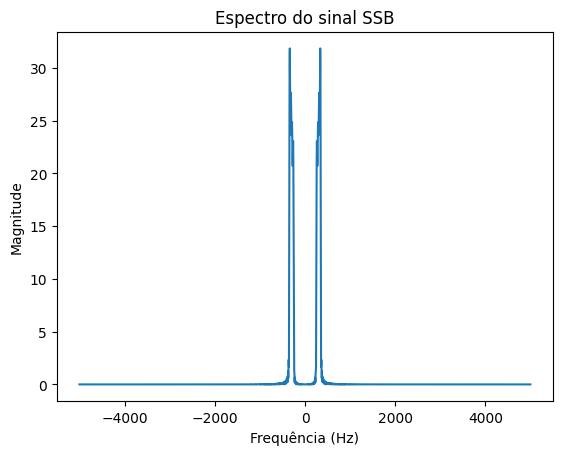

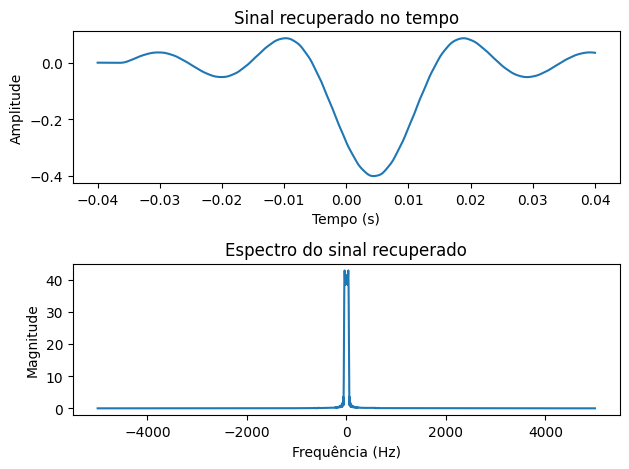

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parâmetros iniciais
ts = 1e-4
t = np.arange(-0.04, 0.04 + ts, ts)
fc = 300

# Sinal modulante (sinc)
m_sig = np.sinc(t / 0.01)

# Comprimentos do sinal e do FFT
Lm_sig = len(m_sig)
Lfft = 2 ** int(np.ceil(np.log2(len(t)) + 1))

# FFT do sinal modulante
M_fre = np.fft.fftshift(np.fft.fft(m_sig, Lfft))
freqm = np.fft.fftshift(np.fft.fftfreq(Lfft, ts))

# Banda essencial do sinal modulante
B_m = 150
# Filtro passa-baixa FIR projetado pelo método da janela (Hamming)
h = firwin(41, B_m * 2 * ts, window="hamming")

# Sinal DSB-SC
s_dsb = m_sig * np.cos(2 * np.pi * fc * t)
S_dsb = np.fft.fftshift(np.fft.fft(s_dsb, Lfft))

# Filtro passa-alta com frequência de corte fc
h_hp = firwin(41, fc * 2 * ts, pass_zero=False, window="hamming")
H_hp = np.fft.fftshift(np.fft.fft(h_hp, Lfft))
SSBfilt = H_hp
freqs = np.fft.fftshift(np.fft.fftfreq(Lfft, ts))

# Filtragem para obter o espectro USB
S_ssb = S_dsb * SSBfilt
s_ssb = np.real(np.fft.ifft(np.fft.fftshift(S_ssb)))
s_ssb = s_ssb[:Lm_sig]

# Demodulação coerente
s_dem = s_ssb * np.cos(2 * np.pi * fc * t) * 2
S_dem = np.fft.fftshift(np.fft.fft(s_dem, Lfft))

# Recuperação do sinal por meio de filtro passa-baixa
s_rec = lfilter(h, 1, s_dem)
S_rec = np.fft.fftshift(np.fft.fft(s_rec, Lfft))

# Gráficos (descomente conforme necessário)
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, m_sig)
plt.title("Sinal modulante (Sinc)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(freqm, np.abs(M_fre))
plt.title("Espectro do sinal modulante")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.subplot(3, 1, 3)
plt.plot(freqs, np.abs(S_dsb))
plt.title("Espectro do sinal DSB-SC")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(freqs, np.abs(S_ssb))
plt.title("Espectro do sinal SSB")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.show()

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, s_rec)
plt.title("Sinal recuperado no tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(S_rec))
plt.title("Espectro do sinal recuperado")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()
